<a href="https://colab.research.google.com/github/adalbertii/Modele-klasyfikacyjne/blob/main/digit_recognition_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Construction of neural networks - digit recognition model case





Using the Keras library




---




Step 1 - Loading the Required Libraries and Modules

In [67]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation

import seaborn as sns
sns.set()


Step 2 - loading MNIST dataset and split into train and test sets.
Loading data form: https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

In [68]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Step 3 - checking dataset

In [69]:
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [70]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [71]:
y_train[5]

2

<ipython-input-72-619a78cd746a>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


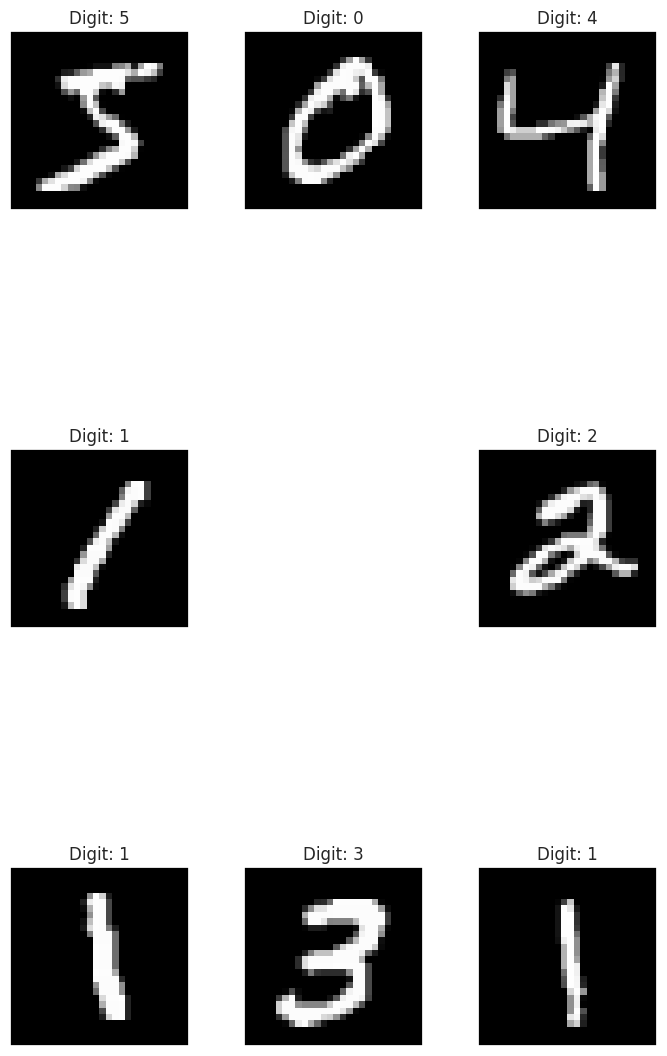

In [72]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

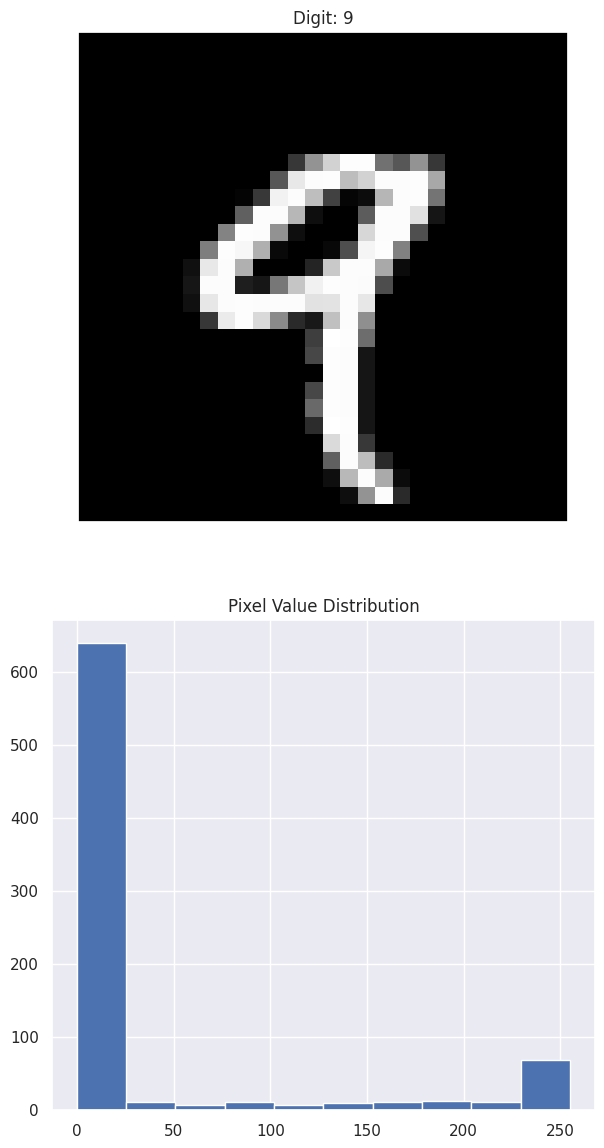

In [73]:
# checkin value distribution
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[4], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[4]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [74]:
#checkng distribution in whole array of y_train dataset
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


Step 4 - reshaping and noramlization

In [75]:
# the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [76]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [77]:
print("shape of X_train:", X_train.shape )
print("shape of X_test:", X_test.shape )

shape of X_train: (60000, 784)
shape of X_test: (10000, 784)


In [78]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [79]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [80]:
# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [81]:
#encode our categories - digits from 0 to 9 - using one-hot encoding. The result is a vector with a length equal to the number of categories.
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (60000,)


In [82]:
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape after one-hot encoding:  (60000, 10)


In [83]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Step 5 - building neural network

In [84]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 activation_3 (Activation)   (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [ ]:
json_m = model.to_json()
json_m

Step 6 - compiling and training model

In [86]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [87]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=0,
          validation_data=(X_test, Y_test))

<ipython-input-88-a336f54c26f1>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


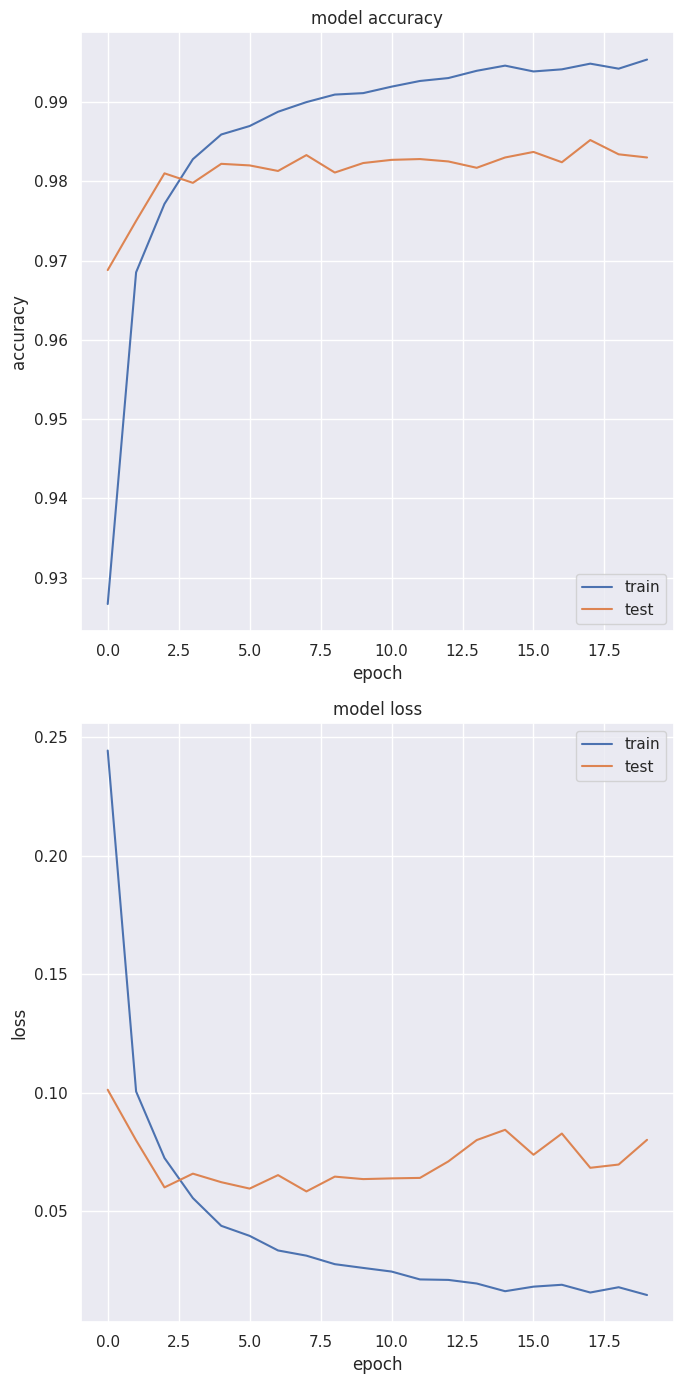

In [88]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

Step 7 -checking the prediction result

In [89]:
predicted_classes = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [94]:
np.set_printoptions(precision=5, suppress=True)


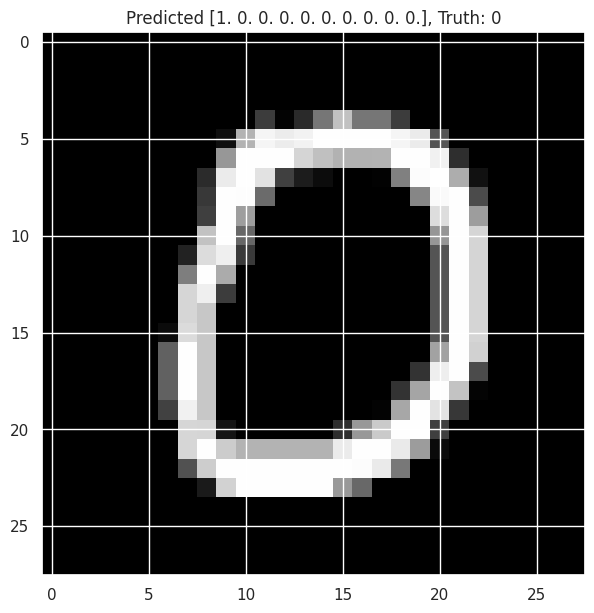

In [95]:
plt.rcParams['figure.figsize'] = (7,14)

figure = plt.figure()
plt.imshow(X_test[10].reshape(28,28), cmap='gray', interpolation='none')
plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[10],
                                       y_test[10]))

figure


In [97]:
from sklearn.metrics import ConfusionMatrixDisplay

In [98]:
Y_pred = model.predict(X_test)


313/313 [==============================] - 2s 5ms/step


In [99]:
Y_pred_classes =np.argmax(Y_pred, axis=1)

In [100]:
Y_true= np.argmax(Y_test, axis=1)


In [101]:
confusion_m= confusion_matrix(Y_true, Y_pred_classes)
print(confusion_m)

[[ 975    0    0    1    1    0    1    0    1    1]
 [   0 1128    0    1    0    1    2    0    3    0]
 [   5    0 1019    0    1    0    0    5    1    1]
 [   0    0    4  994    0    2    0    6    2    2]
 [   0    1    4    0  969    0    2    2    1    3]
 [   2    0    0    8    1  872    2    1    5    1]
 [   3    2    0    0    3    4  945    0    1    0]
 [   0    1    5    0    0    0    0 1019    3    0]
 [   1    1    2    5    0    3    0    6  953    3]
 [   0    3    0    6   20    2    0   18    4  956]]


In [114]:
!pip install Pillow

In [115]:
from PIL import Image

In [117]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_m, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f')
plt.title("Heatmap dla predykcji na danych testowych")
plt.savefig("heatmap.png")
plt.show()




In [ ]:
im = Image.open("heatmap.png")
im.show()
